### TASK 1

In [127]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [128]:
boston = load_boston()
data = boston.data
target = boston.target
features = boston.feature_names
X = pd.DataFrame(data, columns=features)
Y = pd.DataFrame(target, columns=['price'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

/git/gb.pyadvance/env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing da

In [129]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)
check_test = pd.DataFrame({'Y_test': Y_test['price'],
                            'Y_pred': Y_pred.flatten()},
                            columns = ['Y_test', 'Y_pred'])

In [130]:
check_test['error'] = check_test['Y_pred'] - check_test['Y_test']
print(check_test.head(10))

     Y_test     Y_pred     error
173    23.6  28.838854  5.238854
274    32.4  36.007833  3.607833
491    13.6  15.083248  1.483248
72     22.8  25.230909  2.430909
452    16.1  18.878641  2.778641
76     20.0  23.213983  3.213983
316    17.8  17.593112 -0.206888
140    14.0  14.305081  0.305081
471    19.6  23.054390  3.454390
500    16.8  20.620083  3.820083


In [131]:
initial_mse = (check_test['error'] ** 2).mean()

initial_mae = (np.abs(check_test['error'])).mean()

In [132]:
initial_mse = mean_squared_error(Y_test, Y_pred)
initial_mae = mean_absolute_error(Y_test, Y_pred)
score = r2_score(Y_test, Y_pred)
print(score)

0.6844267283527075


In [133]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [134]:
lr.fit(X_train_scaled, Y_train)
Y_pred = lr.predict(X_test_scaled)
score = r2_score(Y_test, Y_pred)
print(score)

0.6844267283527132


Text(0, 0.5, 'Feature')

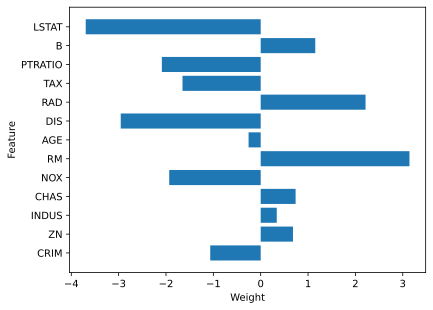

In [135]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.barh(X_train.columns, lr.coef_.flatten())
plt.xlabel('Weight')
plt.ylabel('Feature')

### TASK 2

In [136]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [137]:
clf = RandomForestClassifier(n_estimators = 1000, max_depth = 12, random_state = 42)
Y_train = LabelEncoder().fit_transform(Y_train.values[:,0])
clf.fit(X_train_scaled, Y_train)
Y_pred = clf.predict(X_test_scaled)
score = r2_score(Y_test, Y_pred)
print(score)

-92.17859849568089


На данных стоимости квартир в Бостоне, линейная регрессионная модель работает лучше, так как больше подходит (В связи с continous датой)